# **Introducción al dataset**

El dataset contiene información detallada sobre canciones de Spotify, incluyendo metadatos generales como el nombre del artista y el álbum, así como características musicales extraídas por la plataforma. 

# *Resumen de las columnas*
- track_id: Identificador único de Spotify para cada canción.
- artists: Nombre(s) del/los artista(s) que interpretan la canción, separados por ; en caso de múltiples artistas.
- album_name: Nombre del álbum en el que aparece la canción.
- track_name: Nombre de la canción.
- popularity: Popularidad de la canción en una escala de 0 a 100, basada en el número y la frecuencia de reproducciones.
- duration_ms: Duración de la canción en milisegundos.
- explicit: Indica si la canción tiene contenido explícito (True) o no (False).
- danceability: Índice de bailabilidad de la canción en una escala de 0.0 a 1.0, basado en ritmo, estabilidad y regularidad.
- energy: Nivel de energía de la canción en una escala de 0.0 a 1.0; valores altos indican canciones rápidas e intensas.
- key: Tono de la canción representado en notación estándar (0 = C, 1 = C♯/D♭, etc.). Si no se detecta, el valor es -1.
- loudness: Nivel de volumen general de la canción en decibelios (dB).
- mode: Indica si la canción está en tono mayor (1) o menor (0).
- speechiness: Identifica la presencia de palabras habladas en la canción, con valores altos indicando más contenido hablado.
- acousticness: Medida de confianza (0.0 a 1.0) sobre si la canción es acústica.
- instrumentalness: Predice si una canción no contiene voces; valores cercanos a 1.0 indican alta probabilidad de ser instrumental.
- liveness: Detecta la presencia de audiencia en la grabación; valores altos indican mayor probabilidad de ser una interpretación en vivo.
- valence: Representa la positividad musical de una canción en una escala de 0.0 a 1.0 (valores altos indican un tono alegre).
- tempo: Velocidad estimada de la canción en beats por minuto (BPM).
- time_signature: Firma de compás de la canción, con valores de 3 a 7 indicando medidas como 3/4 o 7/4.
- track_genre: Género musical al que pertenece la canción.

In [2]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Download latest version
path = kagglehub.dataset_download("maharshipandya/-spotify-tracks-dataset")
file_path = path + r"\dataset.csv"
print("Path to dataset files:", file_path)

Path to dataset files: C:\Users\Administrador.T14-PF36M17X\.cache\kagglehub\datasets\maharshipandya\-spotify-tracks-dataset\versions\1\dataset.csv


In [4]:
# Cargar el dataset en un DataFrame
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


----------------------------------------------------------------------------------------------------

# ANÁLISI INICIAL

In [5]:
#Obtenemos la info general del df
print(df.info())


#Validamos que no haya nulos
print("")
print("Hay valores nulos:", print(df.isnull()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

Vemos que tenemos 19 columnas, hay 114000 registros, ninguno de ellos es nulo (lo vemos en el mensaje final). Hay columnas de tipo int, float, boleanas y objetos.

La columna track_id es un identificador único para cada canción, por lo que se usará como índice del DataFrame. La columna Unnamed es innecesaria teniendo track_id como referencia, por lo que la elimino para evitar redundancias. 

In [6]:
df = df.set_index('track_id')
df.index.name = 'Identificador'

if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

df


,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
Identificador,,,,,,,,,,,,,,,,,,,
5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music


Ejecutamos el siguiente codigo para ver si hay duplicados para la columna Identificador
Vemos que si que hay duplicados, la ejecución del siguiente código nos permite ver que para una misma canción y un mismo ID, los registros son casi idénticos excepto la columna de género. 


In [7]:
df[['artists',
 'album_name',
 'track_name',
 'popularity',
 'duration_ms',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature',
 'track_genre']].sort_values(by='popularity', ascending=False).head(10)  


,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
Identificador,,,,,,,,,,,,,,,,,,,
3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,pop
3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,dance
2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,2,-5.548,1,0.0440,0.01250,0.033000,0.230,0.550,128.033,4,hip-hop
5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,reggaeton
4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,edm
4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,dance
4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,pop
5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,reggae
5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,latin


Para poder "eliminar" estos duplicados sin perder información, vamos a juntas ambos registros ya convertir la columna de género en una lista con los géneros concatenados

In [8]:
#df = df.groupby(df.columns.difference(['track_genre']).tolist(), as_index=False).agg({
#    'track_genre': lambda x: ' , '.join(x.unique()) 
#}).reset_index(drop=True)



Ejecutamos lo mismo de antes para comparara y ver si los cambios se han realizado correctamente

In [9]:
df[[
 'artists',
 'album_name',
 'track_name',
 'popularity',
 'duration_ms',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature',
 'track_genre']].sort_values(by='popularity', ascending=False).head(10)  


,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
Identificador,,,,,,,,,,,,,,,,,,,
3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,pop
3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,dance
2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,2,-5.548,1,0.0440,0.01250,0.033000,0.230,0.550,128.033,4,hip-hop
5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,reggaeton
4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,edm
4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,dance
4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,pop
5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,reggae
5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,latin


En el output anterior vemos que efectivamente, los registros se han unificado y se han concatenado los géneros. 

A continuación añadiremos la columan duration_min para poder tener la duración de la canción en minutos y que sea más facil de entender

In [10]:
df['duration_min'] = df['duration_ms'] / 60000
df


,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min
Identificador,,,,,,,,,,,,,,,,,,,,
5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,3.844433
4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,2.493500
1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,3.513767
6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,3.365550
5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,3.314217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,6.416650
1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,6.416667
6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,4.524433


También como veo muchos tipos de genero variados, voy a unificarlos todos en 10 grupos diferentes

In [11]:
# Diccionario para mapear los géneros
genre_mapping = {
    'Acoustic': ['acoustic'],
    'Blues': ['blues'],
    'Jazz': ['jazz'],
    'Pop': ['j-pop', 'pop', 'british'],
    'Rock': ['rock', 'grunge', 'hard-rock', 'metal', 'garage', 'punk-rock'],
    'Alternative Rock': ['alt-rock', 'alternative'],
    'Indie': ['indie', 'indie-pop'],
    'Folk': ['folk'],
    'Reggeaton': ['brazil', 'spanish', 'dance', 'latin'],
    'Punk': ['punk'],
    'R&B': ['r-n-b', 'soul', 'chill'],
    'Hip-Hop': ['hip-hop'],
    'Electronic': ['electronic', 'trip-hop'],
    'Reggae': ['reggae'],
    'Samba': ['samba'],
    'Afrobeat': ['afrobeat'],
}

# Función para mapear los géneros
def map_genre(genre):
    for mapped_genre, keywords in genre_mapping.items():
        if any(keyword in genre for keyword in keywords):
            return mapped_genre
    return 'Other'  # Si no coincide con ninguno, asigna 'Other'

# Aplicar el mapeo al dataframe
df['mapped_genre'] = df['track_genre'].apply(map_genre)

# Ahora 'mapped_genre' tendrá los géneros mapeados a las categorías correspondientes.


In [12]:
# Géneros únicos ordenados alfabéticamente
unique_genres_sorted = sorted(df['mapped_genre'].unique())
print(unique_genres_sorted)

# Contar cuántos géneros distintos hay
print(f"Número total de géneros únicos: {len(unique_genres_sorted)}")


['Acoustic', 'Afrobeat', 'Alternative Rock', 'Blues', 'Electronic', 'Folk', 'Hip-Hop', 'Indie', 'Jazz', 'Other', 'Pop', 'Punk', 'R&B', 'Reggae', 'Reggeaton', 'Rock', 'Samba']
Número total de géneros únicos: 17


----------------------------------------------------------------------------------------------------------------------------------

# CREACIÓN DE NUEVAS COLUMNAS

Vamos a crear nuevas columnas para poder hacer una posterior visualización del dataset

### Energía Bailable (Energy x Danceability):
Se calculará una nueva columna multiplicando los valores de energy y danceability. Esta métrica reflejará cuán intensa y bailable es cada canción.

In [13]:
df['energy_danceability'] = df['energy'] * df['danceability']


### Positividad de la Canción
Se clasificará cada canción como "Positiva" o "Negativa" en función de su valor de valence, que mide la positividad musical.

In [14]:
df['song_mood'] = df['valence'].apply(lambda x: 'Positiva' if x > 0.5 else 'Negativa')


### Canción Acústica vs. No Acústica
Se clasificará a cada canción como "Acústica" o "No Acústica" según su valor de acousticness.

In [15]:
df['is_acoustic'] = df['acousticness'].apply(lambda x: 'Acústica' if x > 0.5 else 'No Acústica')


### Canción Instrumental vs. Con Voces 
Se clasificará cada canción como "Instrumental" o "Con Voces" según el valor de instrumentalness.

In [16]:
df['is_instrumental'] = df['instrumentalness'].apply(lambda x: 'Instrumental' if x > 0.5 else 'Vocal')


### Popularidad Media por Género
Se calculará la popularidad promedio de las canciones dentro de cada género utilizando la columna track_genre.
Proporciona una visión general de cómo se desempeñan los géneros musicales en términos de popularidad. Es útil para identificar géneros más exitosos o analizar la variabilidad dentro de un género en particular.

In [17]:
genre_popularity = df.groupby('track_genre')['popularity'].mean().reset_index()
genre_popularity = genre_popularity.rename(columns={'popularity': 'avg_popularity_by_genre'})
df = pd.merge(df, genre_popularity[['track_genre', 'avg_popularity_by_genre']], on='track_genre', how='left')


 ### Canción Larga vs. Corta
 Clasificar las canciones según su duración (por ejemplo, canciones de más de 4 minutos como "largas" y las de menos de 3 minutos como "cortas").

In [18]:
df['song_length'] = df['duration_min'].apply(lambda x: 'Larga' if x > 4 else ('Corta' if x < 3 else 'Media'))


Una vez realizados los cambios, vamos a visualizar el df final.

In [19]:
df.columns

Index(['artists', 'album_name', 'track_name', 'popularity', 'duration_ms',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'duration_min',
       'mapped_genre', 'energy_danceability', 'song_mood', 'is_acoustic',
       'is_instrumental', 'avg_popularity_by_genre', 'song_length'],
      dtype='object')

-------------------------------------------------------------------------

## Visualización
Que quiero visualizar y tratar de explicar? -> Cómo influyen las características musicales en la popularidad de las canciones

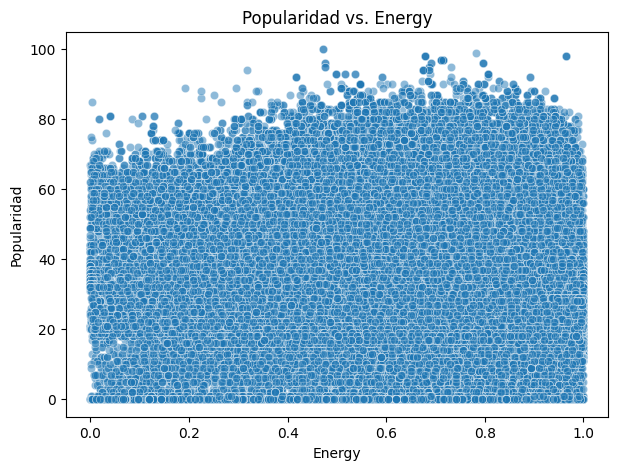

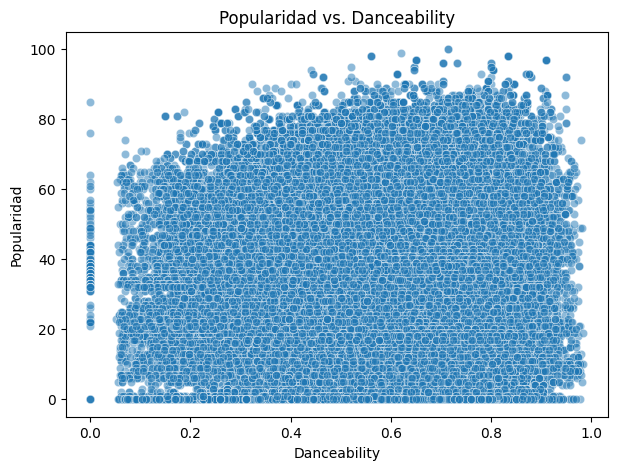

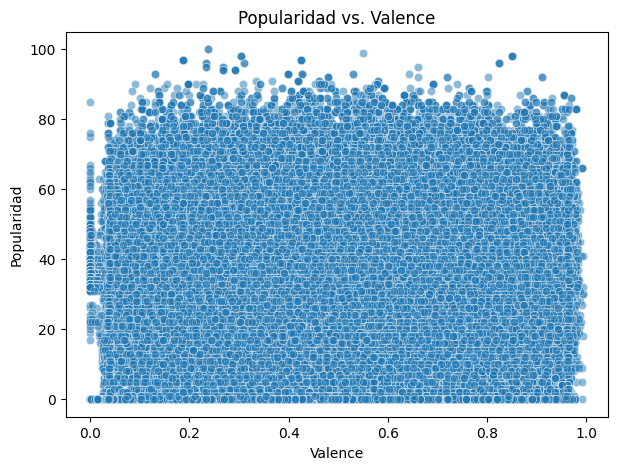

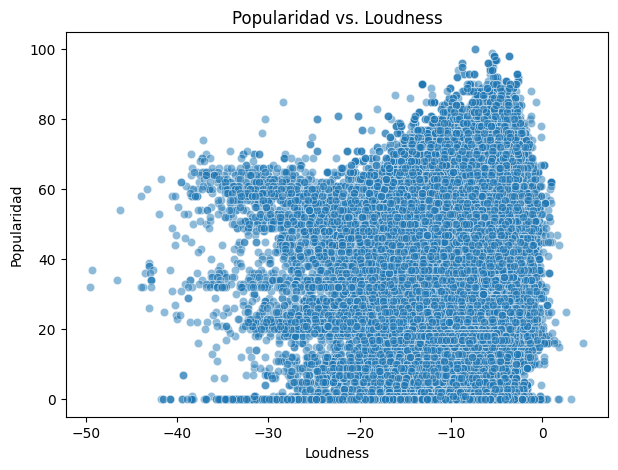

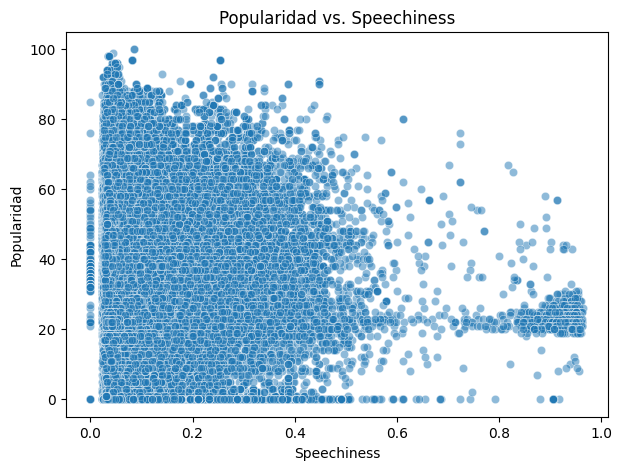

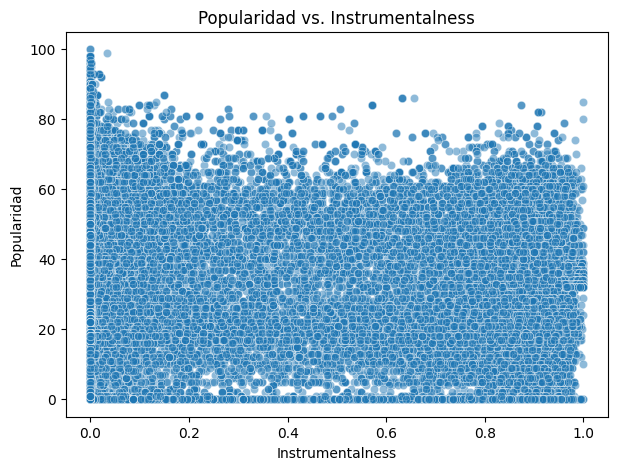

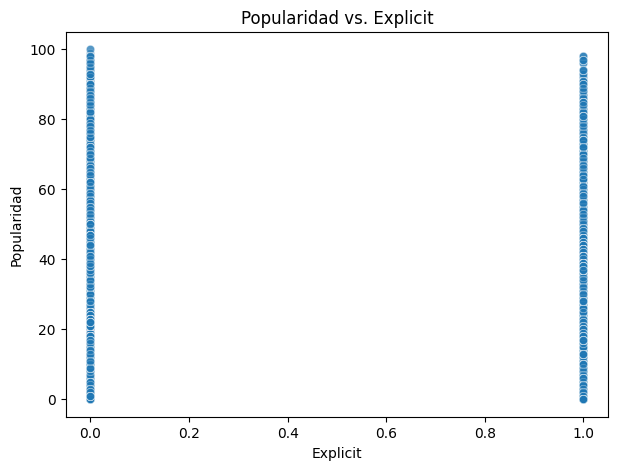

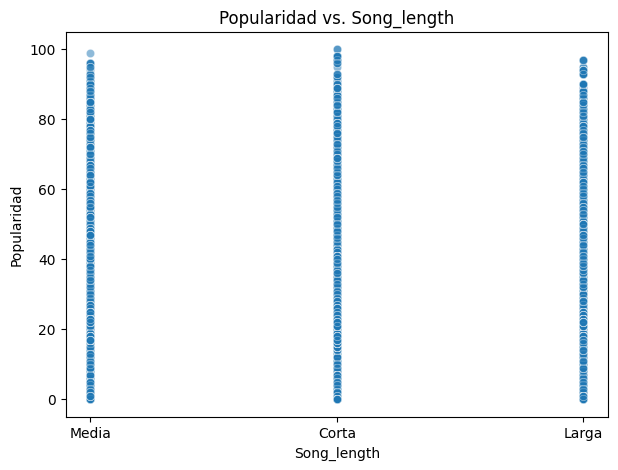

In [50]:
features = ['energy', 'danceability', 'valence', 'loudness', 'speechiness', 'instrumentalness','explicit', 'song_length']

for feature in features:  # Itera sobre las características
    plt.figure(figsize=(7, 5))  # Crea una figura nueva para cada gráfico
    sns.scatterplot(data=df, x=feature, y='popularity', alpha=0.5)
    plt.title(f'Popularidad vs. {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Popularidad')
    plt.show()


Vemos que columnas con datos binarios o que solo pueden tomar unos pocos estados, no nos aportan información. 
Vemos también que en cuanto a valence, no pdemos obtener conclusiones basandonos en este gráfico. 

En el resto de campos podemos ver como la bailabilidad, la energia, el volumen afecta positivamente a la popularidad, 
Mientras que el spichness o la instrumentalidad no se ven tan positivamente afectadas. 

C:\Users\Administrador.T14-PF36M17X\AppData\Local\Temp\ipykernel_11576\2327686194.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_popularity.values, y=genre_popularity.index, palette='viridis')


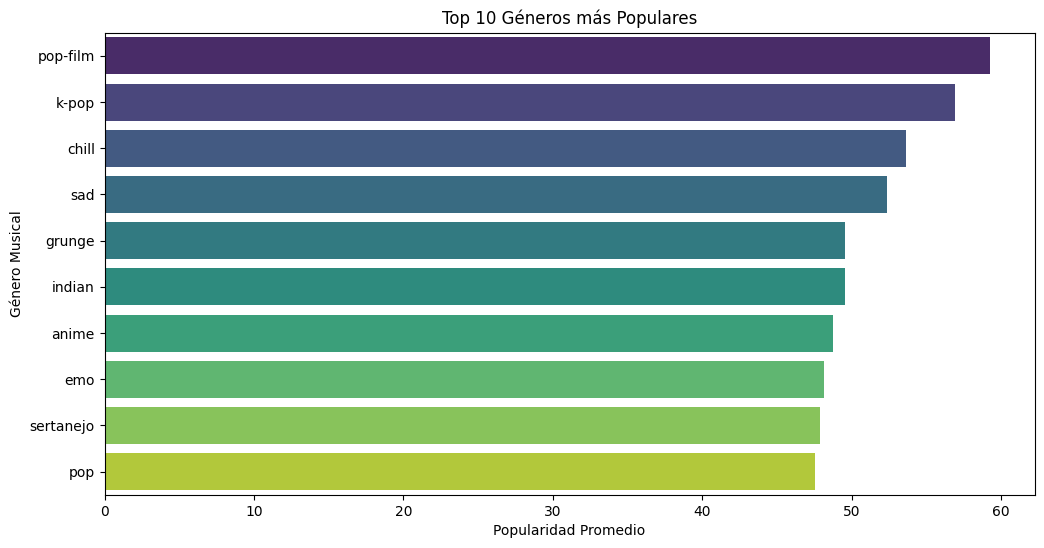

In [ ]:
# Objetivo: Evaluar qué géneros son más populares 
plt.figure(figsize=(12, 6))
genre_popularity = df.groupby('track_genre')['avg_popularity_by_genre'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=genre_popularity.values, y=genre_popularity.index, palette='viridis')
plt.xlabel('Popularidad Promedio')
plt.ylabel('Género Musical')
plt.title('Top 10 Géneros más Populares')
plt.show()


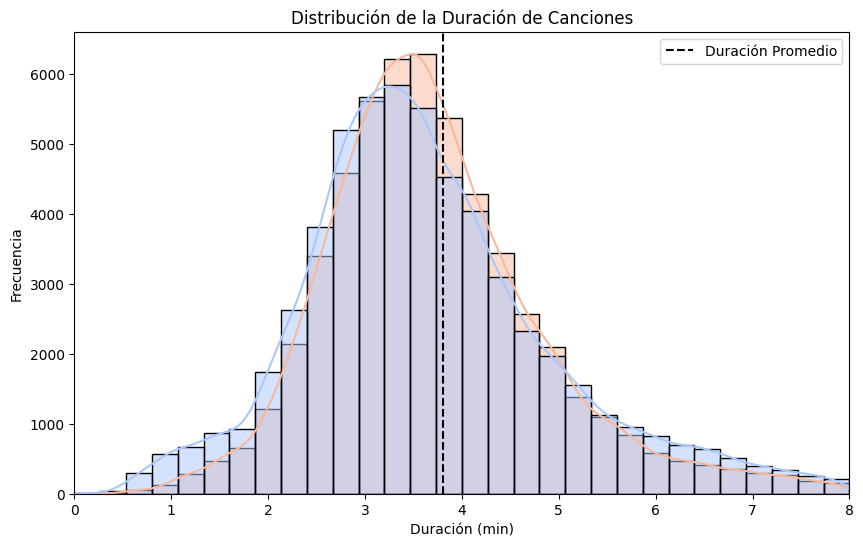

In [45]:
# Objetivo: Explorar si existe una duración ideal para que una canción sea popular.
plt.figure(figsize=(10, 6))
sns.histplot(df[df['duration_min'] <= 8], x='duration_min', bins=30, kde=True, hue=df['popularity'] > df['popularity'].median(), palette='coolwarm')
plt.axvline(df['duration_min'].mean(), color='black', linestyle='dashed', label='Duración Promedio')
plt.xlabel('Duración (min)')
plt.xlim(0, 8)
plt.ylabel('Frecuencia')
plt.title('Distribución de la Duración de Canciones')
plt.legend()
plt.show()

Vemos que las canciones por encima de la media en cuanto a popularidad, son ligeremente más cortas. Vamos a comprobar esto con más gráficos:

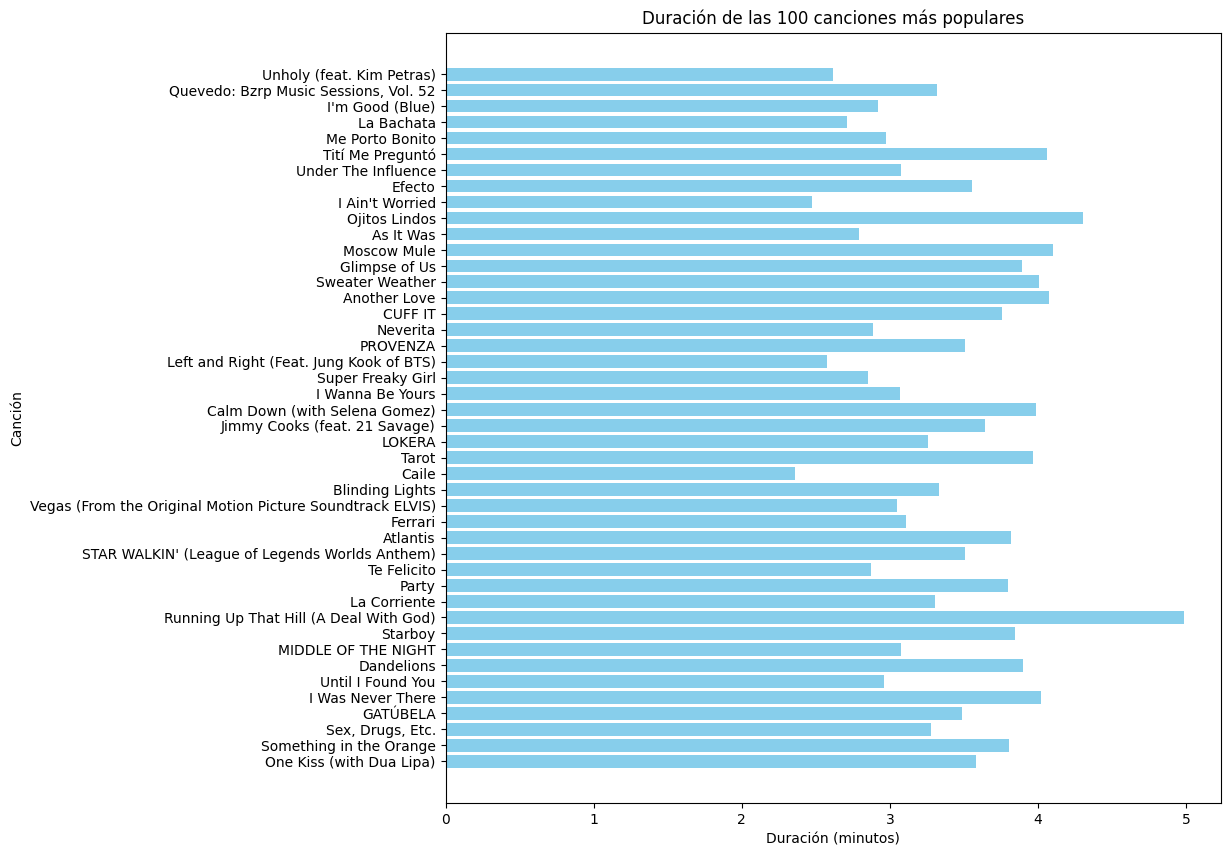

In [46]:
# Seleccionar las n canciones más populares
top_5_songs = df.nlargest(100, 'popularity')[['track_name', 'duration_min']]

# Graficar
plt.figure(figsize=(10,10))
plt.barh(top_5_songs['track_name'], top_5_songs['duration_min'], color='skyblue')
plt.xlabel("Duración (minutos)")
plt.ylabel("Canción")
plt.title("Duración de las 100 canciones más populares")
plt.gca().invert_yaxis()  # Invertir el eje para que la canción más popular esté arriba
plt.show()

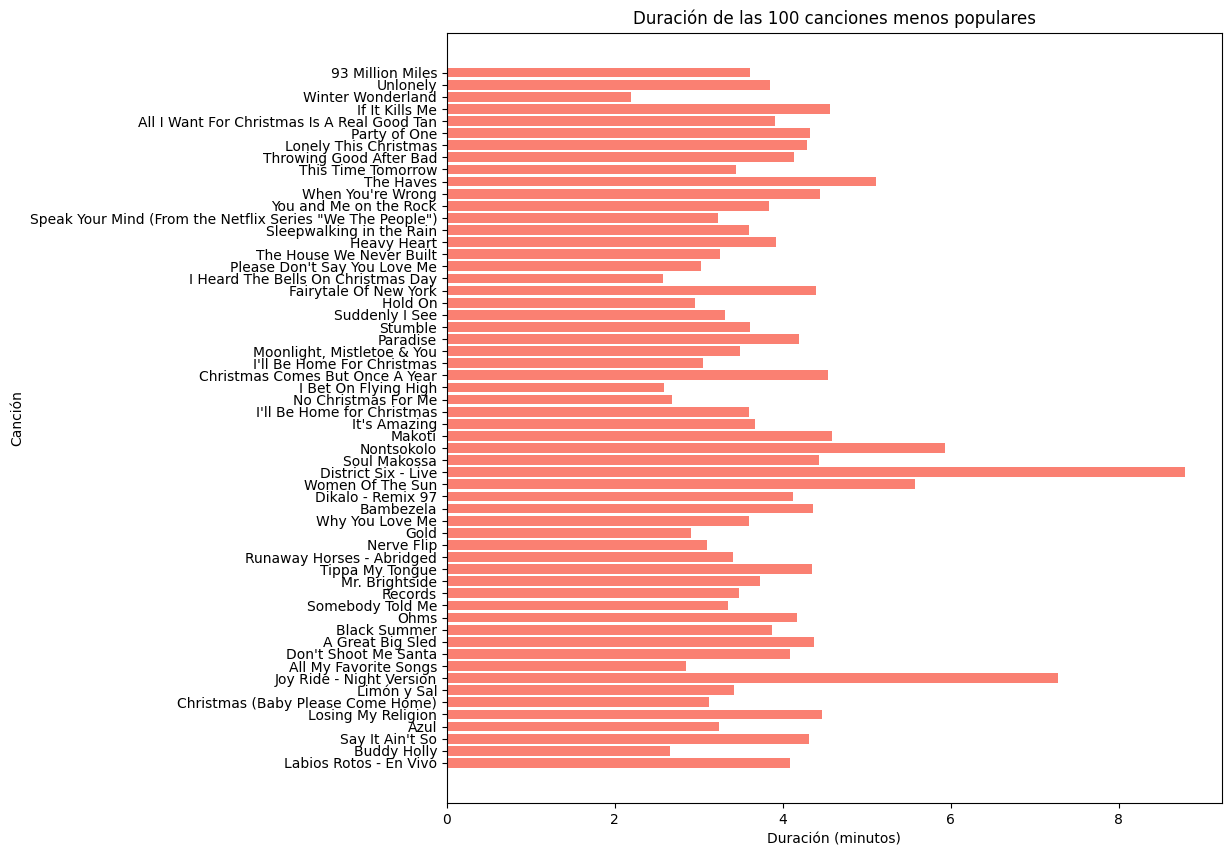

In [47]:
# Seleccionar las n canciones menos populares
bottom_5_songs = df.nsmallest(100, 'popularity')[['track_name', 'duration_min']]

# Graficar las 5 canciones menos populares
plt.figure(figsize=(10,10))
plt.barh(bottom_5_songs['track_name'], bottom_5_songs['duration_min'], color='salmon')
plt.xlabel("Duración (minutos)")
plt.ylabel("Canción")
plt.title("Duración de las 100 canciones menos populares")
plt.gca().invert_yaxis()  # Invertir el eje para que la canción menos popular esté arriba
plt.show()

In [42]:
# Calcular las medias de duración
top_5_mean = top_5_songs['duration_min'].mean()
bottom_5_mean = bottom_5_songs['duration_min'].mean()

# Comparar las medias
print(f"Duración media de las 5 canciones más populares: {top_5_mean:.2f} minutos")
print(f"Duración media de las 5 canciones menos populares: {bottom_5_mean:.2f} minutos")

Duración media de las 5 canciones más populares: 3.46 minutos
Duración media de las 5 canciones menos populares: 3.96 minutos


C:\Users\Administrador.T14-PF36M17X\AppData\Local\Temp\ipykernel_11576\3114070194.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='magma')


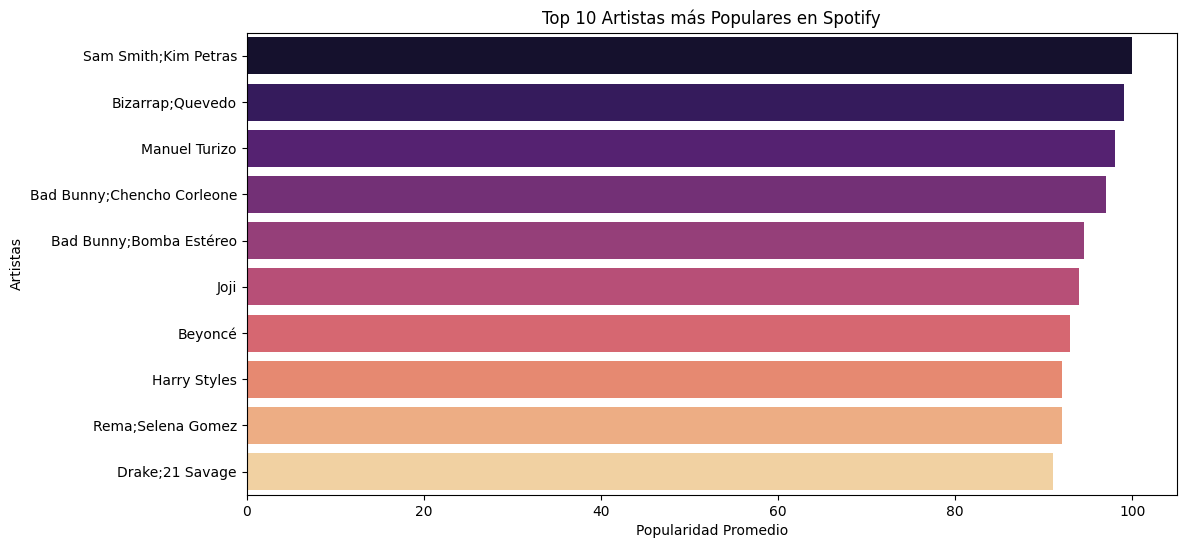

In [23]:
# Objetivo: Identificar los artistas más exitosos y visualizar tendencias en nombres de canciones.
plt.figure(figsize=(12, 6))
top_artists = df.groupby('artists')['popularity'].mean().nlargest(10)
sns.barplot(x=top_artists.values, y=top_artists.index, palette='magma')
plt.xlabel('Popularidad Promedio')
plt.ylabel('Artistas')
plt.title('Top 10 Artistas más Populares en Spotify')
plt.show()

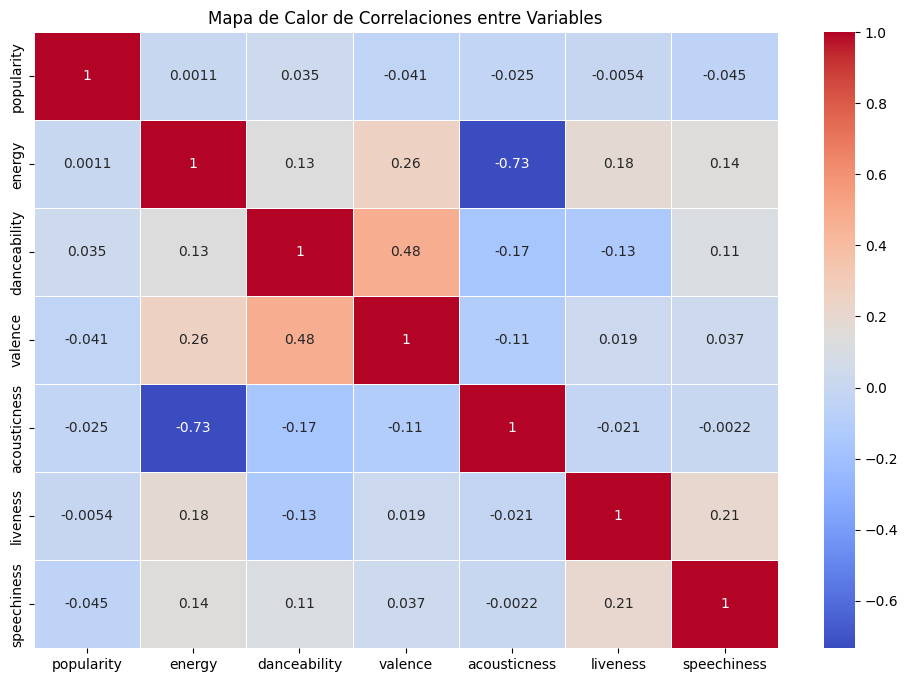

In [ ]:
#  Mapa de Calor de Correlaciones
# --------------------------------------------------
plt.figure(figsize=(12, 8))
corr_matrix = df[['popularity', 'energy', 'danceability', 'valence', 'acousticness', 'liveness', 'speechiness']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones entre Variables')
plt.show()

Los dos campos más correlacionados con la popularidad veo que son speechiness, valence y danceability. Lo que tiene sentido porque representan canciones con ritmo, positivas y que contienen letra. 

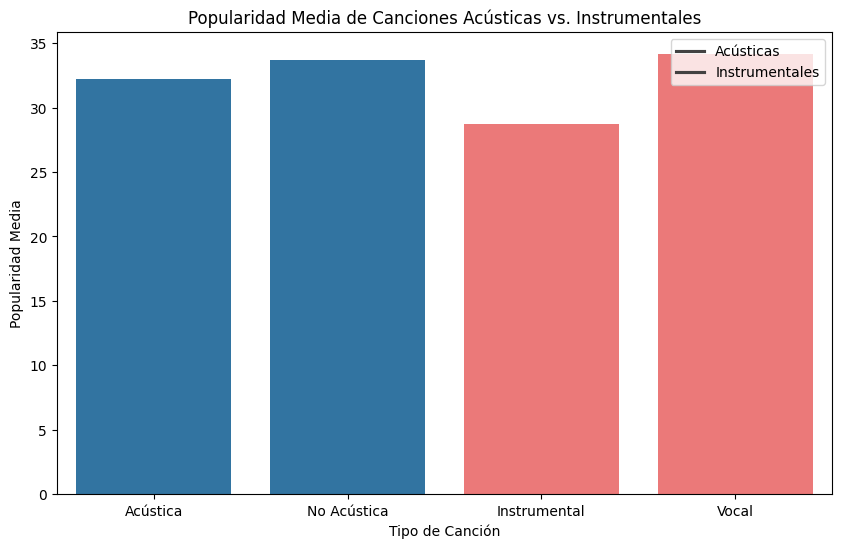

In [25]:
# Gráfico de barras para comparar la popularidad media de las canciones acústicas e instrumentales
acoustic_data = df.groupby('is_acoustic')['popularity'].mean().reset_index()
instrumental_data = df.groupby('is_instrumental')['popularity'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='is_acoustic', y='popularity', data=acoustic_data)
sns.barplot(x='is_instrumental', y='popularity', data=instrumental_data, color='red', alpha=0.6)
plt.title('Popularidad Media de Canciones Acústicas vs. Instrumentales')
plt.xlabel('Tipo de Canción')
plt.ylabel('Popularidad Media')
plt.legend(['Acústicas', 'Instrumentales'])
plt.show()


Vemos que en cuanto a popularidad media las canciones que no son intrumentales o acusticas son más populares

C:\Users\Administrador.T14-PF36M17X\AppData\Local\Temp\ipykernel_11576\329660030.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='song_mood', palette='coolwarm')


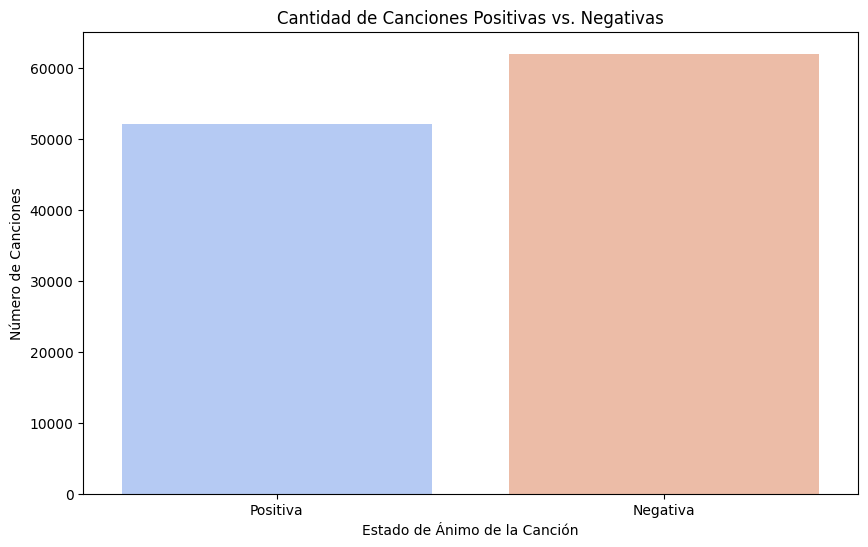

In [26]:
# Gráfico de barras para mostrar la cantidad de canciones positivas vs negativas
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='song_mood', palette='coolwarm')
plt.title('Cantidad de Canciones Positivas vs. Negativas')
plt.xlabel('Estado de Ánimo de la Canción')
plt.ylabel('Número de Canciones')
plt.show()


Vemos que hay más canciones negativas que positivas.

----------------------------------------------------------------------

## Conclusiones generales del análisis
Conclusiones:

1. La relación entre energía y danceabilidad, sugiere que las canciones con alta energía y alta danceabilidad suelen ser más populares.
2. Algunos géneros tienen una popularidad media sigificativamente mayor que otros, lo que sugiere que el género es un factor importante en el éxito de una canción. Este dataset estaba demasiado dividido por géneros y no se ha podido mapear. Pero un set d egéneros más acotado hubieran permitido un mejor análisi.
3. La matriz de correlación indica que características como danceabilidad, energía tienen cierta relación positiva con la popularidad, mientras que otras variables como instrumentalidad o valence tienen impacto más negativo. Lo que encaja con lo primeros gráficos visualizados.
4. Vemos que no existe una diferencia significativa entre las canciones mas populares y las menos populares en cuanto a la duración. Vemos que de media las canciones menos poplares son ligeramente más largas. 


En general vemos una tendencia de popularidad a las canciones con poca letra y con un ritmo enérgico y bailable. También ayuda que sean de carácter negativo, ya sea de tristeza u otras emociones. 